<a href="https://colab.research.google.com/github/enunezs/IntroAI_Assignment/blob/main/Worksheet_3_Week_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This week we will look at some unsupervised clustering algorithms. In this worksheet, we will start off by implementing $k$-means from scratch. We go on to look at using elbow plots to select a good value of $k$.

We go on to complare the behaviour of k-means with hierarchical clustering and Gaussian mixture models.

NB: if you find implementing the $k$-means algorithm form scratch challenging, **don't worry**! Have a go, but the rest of the worksheet is not dependent on doing this, so you can skip that question and come back to it when you finish the rest of the worksheet.

# K-means clustering
In the lecture, we saw that k-means is an unsupervised clustering algorithm. Recall that the algorithm runs as follows:

Given a set of datapoints drawn from $\Omega=\mathbb{R}^n$:

1. ~~Randomly partition the set of datapoints into $k$ sets.~~
2. For each set $P$ calculate its mean vector:
$$
\hat{x}_P=\left( \frac{\sum_{\vec{x} \in P} x_1}{|P|}, \ldots,\frac{\sum_{\vec{x} \in P} x_i}{|P|} \ldots, \frac{\sum_{\vec{x} \in P} x_n}{|P|}  \right)
$$
3. For each datapoint evaluate the squared Euclidean distance from each of the mean vectors e.g. $||\vec{x}-\hat{x}_P ||^2$. Reallocate the datapoint to the partition set the mean of which it is closest to.
4. If the partition sets remain unchanged then stop.  Else go to 2.


## Implementing $k$-means

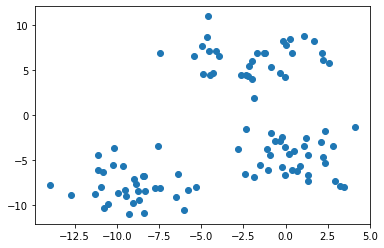

In [ ]:
# The following code creates some artificial data and plots it
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(centers=3,n_samples=100, cluster_std=2, random_state=100)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

Implement a function `kmeans` that takes a value $k$ and the data $X$, clusters the data, and returns the centroids and the labels of the data

In [ ]:
print(X.shape)
print(len(X))

(100, 2)
100


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


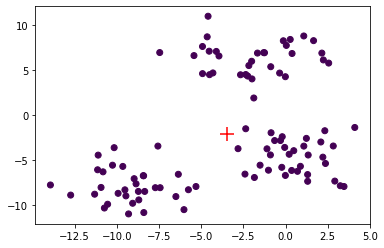

In [ ]:
def kmeans(k, X):
    # randomly assign labels to the data
    x_labels = np.random.randint(k, size=len(X))
    centroids = np.zeros( (k,2) )

    old_labels = x_labels.copy()

    # set up a while loop that will run until the data labels no longer change
    max_iter =100
    for z in range(max_iter):
    #while True:
      # Calculate the centroids of the data
      for i in range(k):
        centroids[i,:] = np.mean(X[x_labels == i],axis=0)   #Get elements with the same label, average them
        #print(x_labels == i)
        #print(X[x_labels == i])


      # For each datapoint:
      centroid_dist = np.zeros( (k,len(X)) ) #Distance of point to each centroid
      for i, x in enumerate(X):
        #Calculate the squared Euclidean distance to each centroid
        for j in range(k):
          centroid_dist[j,i] = np.linalg.norm(x-centroids[j,:])
        
        # Assign new labels based on distance to the centroid
        #print(x_labels)
        x_labels[i] = np.argmin(centroid_dist[:,i])
        #print(x_labels)
        
      # If all the new labels are equal to the old labels, 
      # break out of the while loop
      
      print(np.array_equal(old_labels,x_labels))
      if np.array_equal(old_labels,x_labels):
        print("Convergence at iteration" )
        break

      old_labels = x_labels.copy()
      #print(centroids[:,0])

      # Assign the values of the new labels to the variable labels
      
    # return the centres and the labels.
    return centroids, x_labels

# Plot the centroids on the data. Are they as you would expect?

centres, labels = kmeans(3, X)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels)
ax.scatter(centres[:,0],centres[:,1], color='red',s=200,marker="+")
#ax.scatter(centres[:,0],centres[:,1])


## Using the $k$-means function from scikit-learn
Scikit-learn has $k$-means built in. We import it using the command `from sklearn.cluster import KMeans`. Look at the documentation for KMeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#). The KMeans estimator has 4 attributes. What are they?

The attributes are:
1. `cluster_centers_ndarray of shape (n_clusters, n_features)`
 Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

2. `labels_ndarray of shape (n_samples,)`
Labels of each point.

3. `inertia_float`
Sum of squared distances of samples to their closest cluster center.

4. `n_iter_int`
Number of iterations run.





       


Which attribute would you use if you wanted to look at the labels assigned to the datapoints? What if you wanted to look at the centroids? What would you use the attribute `inertia_` for?

### Generating elbow plots
We will run $k$ means over our toy dataset for multiple values of $k$ and generate an elbow plot. To do this we can use the attribute `inertia_`. This attribute measures the within-cluster sum of squares, or the variance of each cluster, and the $k$ means algorithm works to minimize this quantity. The within-cluster sum of squares is defined as:
$$\sum_{j=1}^k\sum_{x \in P_j}||x - \mu_j||^2$$
To generate the elbow plot, we run $k$ means for values of $k$ from 1 to 10, and plot the inertia at each point. If there is a clear 'elbow' in the plot, then this gives us the optimal value of $k$. Do you see a clear 'elbow' in the plot? If so, what is the optimal value of $k$?
    

Inertia for 1 labels
681.3706000000001,681.3706
Inertia for 2 labels
152.3479517603579,152.34795176035792
Inertia for 3 labels
78.851441426146,78.85144142614601
Inertia for 4 labels
57.25600931571815,57.25600931571815
Inertia for 5 labels
46.44618205128206,46.44618205128205
Inertia for 6 labels
39.03998724608724,39.03998724608725
Inertia for 7 labels
34.299712121212124,34.299712121212124
Inertia for 8 labels
30.0143984962406,30.014398496240602
Inertia for 9 labels
28.03690635345047,28.036906353450473
Inertia for 10 labels
26.53452922077922,26.53452922077922


Text(0.5, 1.0, 'The elbow method showing the optimal k')

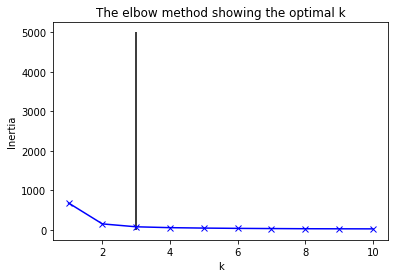

In [ ]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans 

# Optional: write your own function to calculate the inertia 
# (otherwise you can just use the attribute inertia_)
def inertia(X, labels, centroids):
    ##TODO## (Optional)

    print('Inertia for ' + str(np.max(labels)+1) + ' labels')
    inertia_val = 0

    #Iterate through labels
    for n_label in range(np.max(labels+1)):
      #Iterate through properties
      for n_prop in range(len(centroids[0,:])):
        #print(X[:,n_prop][labels==n_label])
        #print(centroids)
        #print([n_label,n_prop])

        inertia_val += np.sum((X[:,n_prop][labels==n_label]-centroids[n_label,n_prop])**2)
      pass
    return inertia_val

        
# Set up a variable to store the inertias
inertias = []
K=10

# Loop over values of k from 1 to 10
for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    ##TODO##
    km = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data
    km.fit(X)
    
    # Store the value of the inertia for this value of k

    my_inertia = inertia(X, km.labels_, km.cluster_centers_)

    print(str(my_inertia) + ',' + str(km.inertia_))
    #print(km.inertia_)
    inertias.append(km.inertia_)

# Plot the elbow
plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')

plt.vlines(3, 0, 5000)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

# Clustering the iris dataset
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in 1936. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). There are four features corresponding to the length and the width of the sepals and petals, in centimetres. Typically, the Iris data set is used as a classification problem, but by considering only the 4-D input feature space we can also apply clustering algorithms to it.

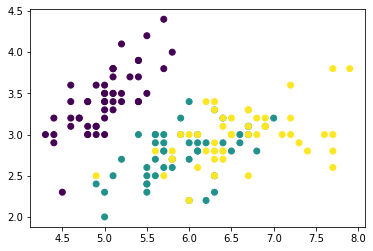

In [ ]:
# Import the iris dataset, and save the data into a variable X 
# (take a look at the documentation here: 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

from sklearn import datasets

iris_data = datasets.load_iris()
X = iris_data.data        # 150 elements, 4 properties
Y = iris_data.target      # 150 tags

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=Y)
#ax.scatter(centres[:,0],centres[:,1])


Let's begin by assuming that since there are 3 types of iris, then there may be 3 clusters. Instantiate a $k$-means classifier with 3 clusters, and fit it to the data. Print out the centroids. You can visualise the resulting clusters by generating scatter plots projected on 2 dimensions. Try generating scatter plots for various combinations of features.

**Extra question** Generate one large plot with subplots for each combination of features.

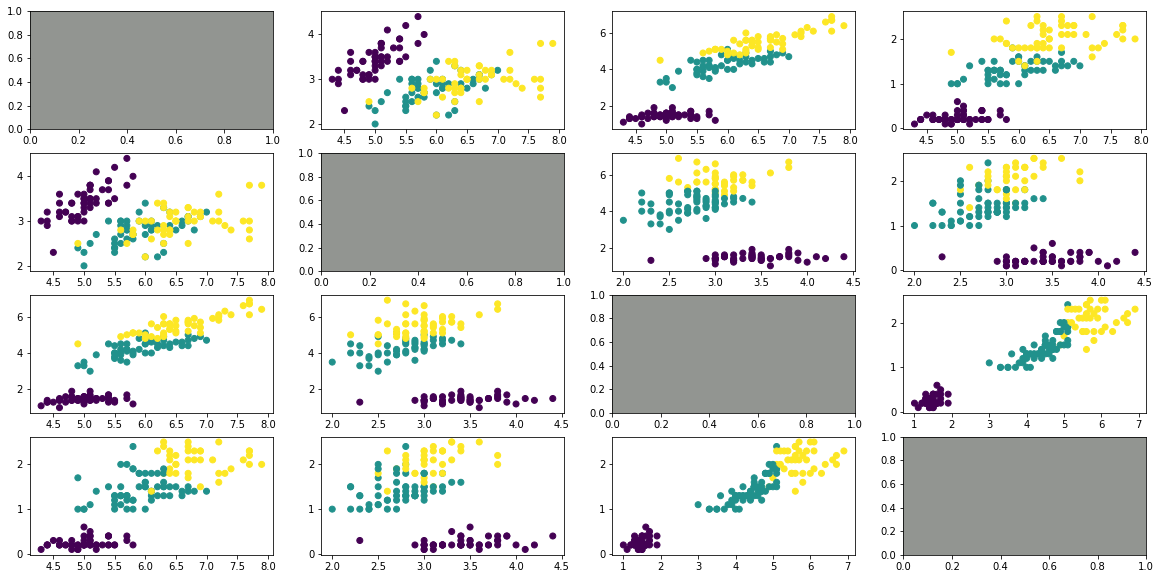

In [ ]:
import matplotlib.pyplot as plt
import numpy
import random
from sklearn.cluster import KMeans 

# Fit the iris dataset
k_number = 3
km = KMeans(n_clusters=k_number, random_state=1234)

# Fit the model to the data
km.fit(X)

# Make a scatter plot of the data on the first two axes
# Experiment with looking at different axes

centres = km.cluster_centers_
labels = km.labels_

fig,axs = plt.subplots(4,4,figsize=(20,10))


#axs[0][0].scatter(X[:,0], X[:,0],c=Y)
axs[0][0].set_facecolor('xkcd:grey')
axs[0][1].scatter(X[:,0], X[:,1],c=Y)
axs[0][2].scatter(X[:,0], X[:,2],c=Y)
axs[0][3].scatter(X[:,0], X[:,3],c=Y)

axs[1][0].scatter(X[:,0], X[:,1],c=Y)
#axs[1][1].scatter(X[:,1], X[:,1],c=Y)
axs[1][1].set_facecolor('xkcd:grey')
axs[1][2].scatter(X[:,1], X[:,2],c=labels)
axs[1][3].scatter(X[:,1], X[:,3],c=labels)

axs[2][0].scatter(X[:,0], X[:,2],c=Y)
axs[2][1].scatter(X[:,1], X[:,2],c=Y)
#axs[2][2].scatter(X[:,2], X[:,2],c=labels)
axs[2][2].set_facecolor('xkcd:grey')
axs[2][3].scatter(X[:,2], X[:,3],c=labels)


axs[3][0].scatter(X[:,0], X[:,3],c=labels)
axs[3][1].scatter(X[:,1], X[:,3],c=labels)
axs[3][2].scatter(X[:,2], X[:,3],c=labels)
axs[3][3].set_facecolor('xkcd:grey')

#axs[2].plot(X[:,1], X[:,3], c=labels)


#Above diagonal: Truth data
#Below diagonal: K means result

Generate an elbow plot for this data set. To what extent does this elbow plot support the assumption that there are three clusters present in the data?

Text(0.5, 1.0, 'The elbow method showing the optimal k')

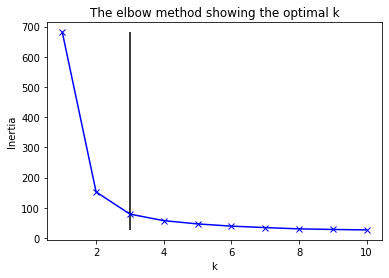

In [ ]:
# Generate an elbow plot for this dataset

inertias = []
K=10

# Loop over values of k from 1 to 10
for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    km = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data
    km.fit(X)
    
    # Store the value of the inertia for this value of k

    my_inertia = inertia(X, km.labels_, km.cluster_centers_)
    inertias.append(km.inertia_)

# Plot the elbow
##TODO##
plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')

plt.vlines(3, np.min(inertias), np.max(inertias))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')

#Not bad but seems to imply that 2 is a clearer bound

# Hierarchical clustering
In this question we investigate the use of hierarchical clustering on the Iris data set. SciPy (pronounced 'Sigh Pie') is a Python-based ecosystem of open-source software for mathematics, science, and engineering. We start by importing packages `dendrogram` and `linkage`.



In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

The following will generate a dendogram for the iris data set:

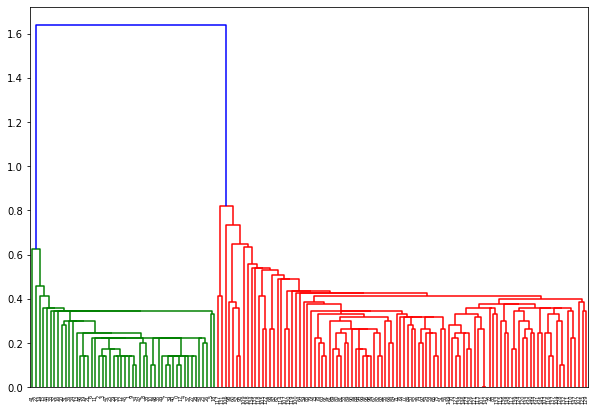

In [ ]:
linked = linkage(X, 'single')
labelList = range(len(X))
plt.figure(figsize=(10, 7)) 
dendrogram(linked,labels=labelList) 
plt.show()

Recall from the lectures that there are a number of ways of measuring the distance between clusters. For example:
* Minimum distance: $d(S,T) = \min\{d(x,y) : x \in S,y \in T\} $
* Average distance: $d(S,T) = \frac{1}{|S||T|} \sum_{(x, y)} d(x, y)$
* Maximum distance: $d(S,T) = \max\{d(x,y) : x \in S,y \in T\} $
* Centroid distance: $ d(S,T) = d(\frac{\sum_{x\in S} x}{|S|} \frac{\sum_{y\in T} y}{|T|})$

The parameter `'single'` in linkage refers to minimum distance. This can be change to `'average'` for average distance, `'complete'` for maximum distance and `'centroid'` for centroid distance. Generate the dendogram for each of these cases. Comment on which metrics are most consistent with the assumption of 3 clusters in the iris data set.

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

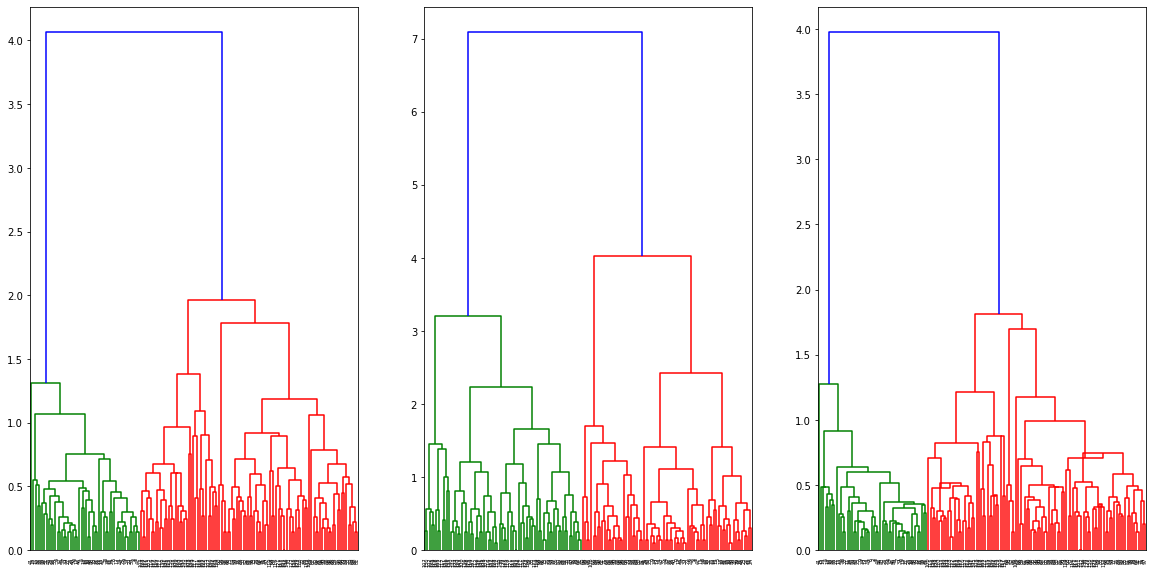

In [ ]:
# Generate dendrograms for each distance metric
fig,ax = plt.subplots(1,3,figsize=(20,10))

# Average distance
linked = linkage(X, 'average')
labelList = range(len(X))
dendrogram(linked,labels=labelList,ax=ax[0]) 

#Maximum distance
linked = linkage(X, 'complete')
dendrogram(linked,labels=labelList,ax=ax[1]) 

#Centroid distance
linked = linkage(X, 'centroid')
dendrogram(linked,labels=labelList,ax=ax[2]) 


The metrics most consistent with the assumption of 3 clusters are:

Average and centroid distance


# Gaussian Mixture models
In this question we investigate the use of Gaussian clustering on the Iris data set.

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

We can extract the parameters for the learnt Gaussian distributions as follows:

In [ ]:
#Center of the cluster
print(gmm.means_)

#Sigma
#Diagonal has variance
print(gmm.covariances_)


[[5.006      3.428      1.462      0.246     ]
 [5.91697517 2.77803998 4.20523542 1.29841561]
 [6.54632887 2.94943079 5.4834877  1.98716063]]
[[[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.27550587 0.09663458 0.18542939 0.05476915]
  [0.09663458 0.09255531 0.09103836 0.04299877]
  [0.18542939 0.09103836 0.20227635 0.0616792 ]
  [0.05476915 0.04299877 0.0616792  0.03232217]]

 [[0.38741443 0.09223101 0.30244612 0.06089936]
  [0.09223101 0.11040631 0.08386768 0.0557538 ]
  [0.30244612 0.08386768 0.32595958 0.07283247]
  [0.06089936 0.0557538  0.07283247 0.08488025]]]


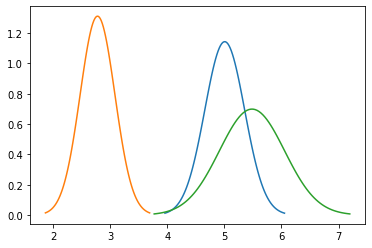

In [ ]:
import scipy.stats as stats

for i in range(3):
  mu = gmm.means_[i,i]
  variance = gmm.covariances_[i,i,i]
  sigma = np.sqrt(variance)
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

How do the means for the three distributions compare with the centroids from a 3-cluster $k$-means on this dataset?

In [ ]:
# Compare the means from the GMM clusters with the means from 
# the k-means clusters

k_number = 3
km = KMeans(n_clusters=k_number, random_state=1234)
km.fit(X)
centres = km.cluster_centers_
print(centres)
labels = km.labels_


print(gmm.means_)


[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[[5.006      3.428      1.462      0.246     ]
 [5.91697517 2.77803998 4.20523542 1.29841561]
 [6.54632887 2.94943079 5.4834877  1.98716063]]


Use the command `print(gmm.weights_)` to look at the weights for each distribution. What do these weights tell us about the composition of the three clusters?

In [ ]:
##TODO##
print(gmm.weights_)
#Each distribution has roughly the same influence! Good sign! 

[0.33333333 0.30118609 0.36548058]


Generate scatter plots for different 2-D combinations of the features.

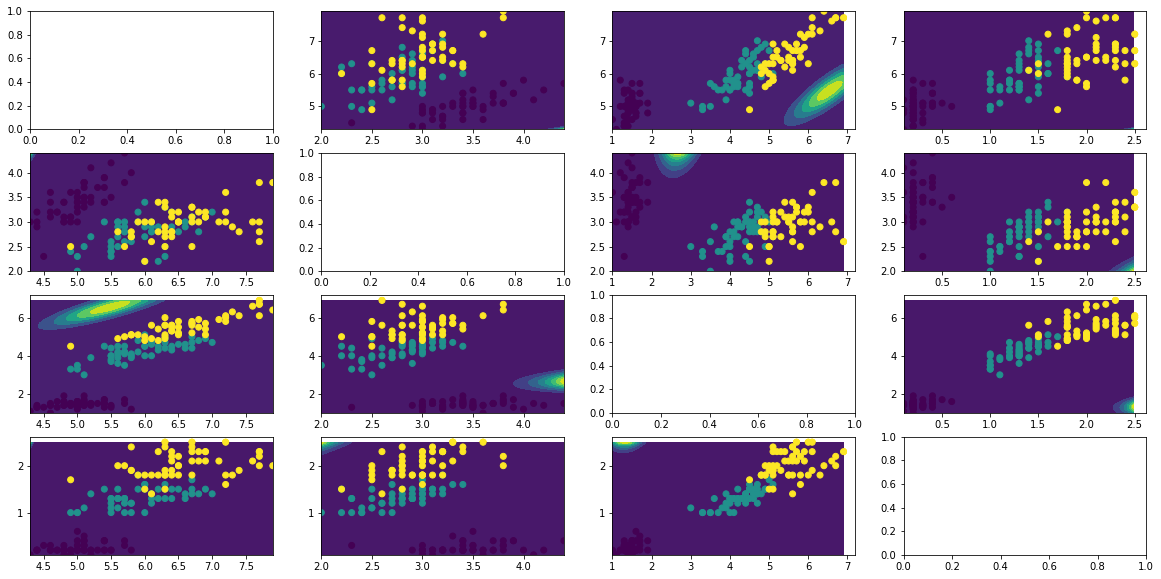

In [ ]:
from scipy.stats import multivariate_normal


fig,axs = plt.subplots(4,4,figsize=(20,10))

'''
for i in range(4):
  for j in range(4):
    if i>j:
      axs[i,j].scatter(X[:,i], X[:,j],c=Y)
    elif i<j:
      axs[i,j].scatter(X[:,j], X[:,i],c=Y)
    else:
      axs[i,j].set_facecolor('xkcd:grey')
'''

for n_class in range(3):
  for i in range(4):
    for j in range(4):
      if i==j:
        #
        continue
      mean = [gmm.means_[n_class,i],gmm.means_[n_class,j]]

      #Calculate cov matrix
      cov = gmm.covariances_[n_class][[i,j],[i,i]]
      cov = np.stack((cov , gmm.covariances_[n_class][[i,j],[j,j]]))

      x, y = np.mgrid[np.amin(X[:,j]):np.amax(X[:,j]):.01, np.amin(X[:,i]):np.amax(X[:,i]):.01]
      pos = np.dstack((x, y))
      rv = multivariate_normal(mean, cov)
      #fig2 = plt.figure()
      #ax2 = fig2.add_subplot(111)
      axs[i,j].contourf(x, y, rv.pdf(pos))
      axs[i,j].scatter(X[:,j], X[:,i],c=Y)

